In [99]:
# import ML tools
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# import plotting tools
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
import seaborn as sns
from IPython.core.pylabtools import figsize
# set grid size and style
figsize(12, 4)
sns.set_style('whitegrid')

Use "mp.colors(<index>)" as color attribute for Seaborn plots.
This is your color palette...


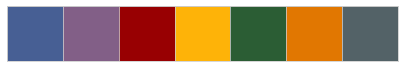

In [3]:
# import custom palette
import my_palette as mp

In [4]:
# read in actor dataset and actor name key data
df = pd.read_json('capstone1_ds.json')
names_df = pd.read_json('names.json')
df.transpose()

,2,3,4,5,6,10,12,13,14,18,...,2574826,2574837,2574839,2574841,2574844,2574851,2584246,2585966,2601586,2606911
actor_value,5.417357,1.420861,0.53693,6.797755,0.055708,0.01187,0.192715,0.669717,1.570837,0.011897,...,4.523209e-17,7.554529e-22,2.779156e-22,1.022394e-22,1.872580e-24,2.310948e-28,-9.000000e-08,0.0,9.544325e-16,3.606126e-17
gender,0.000000,0.000000,1.00000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.000000e+00,0.000000e+00
age,48.000000,55.000000,41.00000,60.000000,58.000000,48.00000,12.000000,57.000000,48.000000,50.000000,...,3.100000e+01,3.900000e+01,6.600000e+01,3.800000e+01,7.700000e+01,4.100000e+01,5.200000e+01,29.0,2.900000e+01,2.800000e+01
runtime,110.000000,120.000000,115.00000,100.000000,130.000000,105.00000,100.000000,110.000000,95.000000,100.000000,...,1.050000e+02,1.050000e+02,1.050000e+02,1.050000e+02,1.050000e+02,1.050000e+02,1.000000e+02,100.0,1.200000e+02,1.300000e+02
rating,69.000000,67.000000,67.00000,70.000000,70.000000,73.00000,69.000000,67.000000,68.000000,66.000000,...,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.400000e+01,63.0,6.000000e+01,7.100000e+01
action,10.000000,19.000000,8.00000,1.000000,11.000000,1.00000,0.000000,0.000000,0.000000,3.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.0,2.000000e+00,1.000000e+00
adventure,9.000000,17.000000,8.00000,1.000000,15.000000,5.00000,2.000000,3.000000,1.000000,11.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.0,2.000000e+00,0.000000e+00
animation,4.000000,1.000000,0.00000,0.000000,4.000000,9.00000,3.000000,5.000000,2.000000,9.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
comedy,2.000000,10.000000,12.00000,1.000000,2.000000,6.00000,2.000000,7.000000,2.000000,17.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.0,2.000000e+00,0.000000e+00
crime,3.000000,7.000000,3.00000,0.000000,0.000000,0.00000,0.000000,4.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0,0.000000e+00,1.000000e+00


In [9]:
X = df.drop('actor_value', axis=1)
y = df['actor_value']

In [30]:
mod_ols = sm.OLS(y, X)

In [31]:
results = mod_ols.fit()

In [32]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            actor_value   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              2.220
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                    0.000675
Time:                        12:58:34   Log-Likelihood:                     -2.5105e+05
No. Observations:               26292   AIC:                                  5.021e+05
Df Residuals:                   26269   BIC:                                  5.023e+05
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [26]:
mod_1 = ols('actor_value ~ rating', df)

In [27]:
results_1 = mod_1.fit()

In [29]:
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:            actor_value   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9154
Date:                Fri, 12 Jun 2020   Prob (F-statistic):              0.339
Time:                        12:58:05   Log-Likelihood:            -2.5107e+05
No. Observations:               26292   AIC:                         5.021e+05
Df Residuals:                   26290   BIC:                         5.022e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -453.6619    402.950     -1.126      0.2

In [151]:
mod_dtr = DecisionTreeRegressor(random_state=27, max_features=2)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [153]:
mod_dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=27, splitter='best')

In [154]:
y_pred = mod_dtr.predict(X_test)

In [155]:
y_pred

array([ 1.41140400e-04,  7.25776000e-05,  1.25761469e-02, ...,
       -2.33765551e-02,  8.68239000e-05, -1.20790658e-01])

In [156]:
r2_score(y_test, y_pred)

0.4556088439131386

In [157]:
np.sqrt(mean_squared_error(y_test, y_pred))

4396.833082835912

In [158]:
mod_dtr.score(X_test, y_test)

0.4556088439131386

In [175]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(mod_dtr.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 2,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 27,
 'splitter': 'best'}


In [ ]:
# First create the base model to tune
base_dtr = DecisionTreeRegressor(random_state=27)
# Fit the random search model
base_dtr.fit(X_train, y_train)
base_dtr.score(X_test, y_test)

In [176]:
from sklearn.model_selection import RandomizedSearchCV

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [177]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
base_dtr = DecisionTreeRegressor(random_state=27)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dtr_random = RandomizedSearchCV(estimator = base_dtr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=27, n_jobs = -1)
# Fit the random search model
dtr_random.fit(X_train, y_train)
dtr_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 119 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.2s finished


{'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [181]:
mod_dtr_best = DecisionTreeRegressor(random_state=27, max_features='sqrt', min_samples_split=10, 
                                     min_samples_leaf=1, max_depth=10)
mod_dtr_best.fit(X_train, y_train)
r2_score(y_test, mod_dtr_best.predict(X_test))

-0.0017833678923824259

In [182]:
mod_dtr_mine = DecisionTreeRegressor(random_state=27, max_features=2)
mod_dtr_mine.fit(X_train, y_train)
r2_score(y_test, mod_dtr_mine.predict(X_test))

0.4556088439131386

In [178]:
dtr_random.score(X_test, y_test)

-0.0017833678923824259

In [112]:
X_nogenre = df[['gender', 'age', 'runtime', 'rating']]

In [117]:
mod_dtr_nogenre = DecisionTreeRegressor(random_state=27, max_features=2)

In [118]:
X_ng_train, X_ng_test, y_train, y_test = train_test_split(X_nogenre, y, test_size=0.2, random_state=27)

In [119]:
mod_dtr_nogenre.fit(X_ng_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=27, splitter='best')

In [120]:
r2_score(y_test, mod_dtr_nogenre.predict(X_ng_test))

-0.018480937959897803

In [122]:
X_genre = df[['action', 'adventure', 'animation', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 
                'history', 'horror', 'music', 'mystery', 'romance', 'science_fiction', 'tv_movie', 'thriller', 
                'war', 'western']]

In [123]:
mod_dtr_genre = DecisionTreeRegressor(random_state=27, max_features=2)

In [124]:
X_g_train, X_g_test, y_train, y_test = train_test_split(X_genre, y, test_size=0.2, random_state=27)

In [125]:
mod_dtr_genre.fit(X_g_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=27, splitter='best')

In [126]:
r2_score(y_test, mod_dtr_genre.predict(X_g_test))

0.00015098955091552568

In [159]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [168]:
# First create the base model to tune
mod_rfr = RandomForestRegressor()
# Fit the random search model
mod_rfr.fit(X_train, y_train)
mod_rfr.score(X_test, y_test)

0.031320324056787086

In [160]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [169]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.3min finished


{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [163]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [170]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 213.7890 degrees.
Accuracy = nan%.


In [171]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X, y)

Model Performance
Average Error: 89.9038 degrees.
Accuracy = nan%.


In [172]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of nan%.


In [174]:
rf_random.score(X_test, y_test)

0.055297596056365195